    Import libraries

In [1]:
import pandas as pd
import os
from datetime import datetime
import datetime
from tqdm.notebook import tqdm, trange
import time
%matplotlib inline

    List the lists in the directory

In [2]:
os.listdir()

['Untitled.ipynb',
 'df_continued.csv',
 '2012-2021_continued.xls',
 'df_cont',
 '2012-2021.csv',
 'after_cleaning.csv',
 'whole_dataset.csv',
 'df_cont.csv',
 'whole_dataset',
 '2012-2021.xls',
 '.ipynb_checkpoints',
 'df_final.csv',
 '2012-2021_new.csv',
 'project.ipynb']

    Read CSV files

In [195]:
data1 = pd.read_excel('2012-2021.xls', index_col=False, skiprows=1)

In [196]:
data2 = pd.read_excel('2012-2021_continued.xls', index_col=False, skiprows=1)

### Replacing the unnecessary added column
    df_cont.drop(['Unnamed: 0'], axis=1, inplace=True)

In [128]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   المخزن             65534 non-null  object 
 1   الرقم              65534 non-null  int64  
 2   النوع              65534 non-null  object 
 3   الكود              26238 non-null  float64
 4   العميل             65534 non-null  object 
 5   التاريخ            65534 non-null  object 
 6   ع.أصناف            65534 non-null  int64  
 7   ع.أصناف الأستبدال  65534 non-null  int64  
 8   ق.الفاتورة         65534 non-null  float64
 9   ق.بعد الخصم        65534 non-null  float64
 10  ق.الصافى           65534 non-null  float64
 11  ق.الإستبدالات      65534 non-null  int64  
 12  ن.الخصم            65534 non-null  float64
 13  ق.الخصم            65534 non-null  float64
 14  مبلغ مع المندوب    65534 non-null  int64  
 15  تخصص               65524 non-null  object 
 16  عيادة              0 n

In [100]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31512 entries, 0 to 31511
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   الرقم              31512 non-null  int64  
 1   النوع              31512 non-null  object 
 2   الكود              12047 non-null  float64
 3   العميل             31512 non-null  object 
 4   التاريخ            31512 non-null  object 
 5   ع.أصناف            31512 non-null  int64  
 6   ع.أصناف الأستبدال  31512 non-null  int64  
 7   ق.الفاتورة         31512 non-null  float64
 8   ق.بعد الخصم        31512 non-null  float64
 9   ق.الصافى           31512 non-null  float64
 10  ق.الإستبدالات      31512 non-null  int64  
 11  ن.الخصم            31512 non-null  float64
 12  ق.الخصم            31512 non-null  float64
 13  مبلغ مع المندوب    31512 non-null  int64  
 14  تخصص               31508 non-null  object 
 15  عيادة              0 non-null      float64
 16  مصاريف إضافية      315

    Merge my two dataframes first

In [197]:
df = pd.concat([data1, data2], ignore_index=True)

    Take a peak at the file

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97046 entries, 0 to 97045
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   المخزن             65534 non-null  object 
 1   الرقم              97046 non-null  int64  
 2   النوع              97046 non-null  object 
 3   الكود              38285 non-null  float64
 4   العميل             97046 non-null  object 
 5   التاريخ            97046 non-null  object 
 6   ع.أصناف            97046 non-null  int64  
 7   ع.أصناف الأستبدال  97046 non-null  int64  
 8   ق.الفاتورة         97046 non-null  float64
 9   ق.بعد الخصم        97046 non-null  float64
 10  ق.الصافى           97046 non-null  float64
 11  ق.الإستبدالات      97046 non-null  int64  
 12  ن.الخصم            97046 non-null  float64
 13  ق.الخصم            97046 non-null  float64
 14  مبلغ مع المندوب    97046 non-null  int64  
 15  تخصص               97032 non-null  object 
 16  عيادة              0 n

    Clean the data as follows:
        1- Drop the unnecessary columns. 
        2- Create a list with column names.
        3- Replace old column names with the new column names.
        4- Save the edit to a csv file and read the file to a df_new
        5- Drop rows that conatain 'تعاقدات', 'آجل'.
        6- Replace the values in the column 'client_name' that have a value of
            '.' to the word 'cash'.
        7- Replace the null values in the column 'client_code' with 'cash'.
        8- Seperate the date from the time into two new columns.
        9- Drop the original date column with the mixed date types.
        10- Replace the bill_type values from Arabic names to English ones.
        11- Save the final prototype to a new file to work on it seperately.

    1- First for the drop column stage

In [199]:
df.drop(['المستخدم', 'مصاريف إضافية', 'عيادة', 'مبلغ مع المندوب', 'ق.الإستبدالات', 'ع.أصناف الأستبدال', 'المخزن', 'تخصص', 'المستخدم','عنوان التوصيل', 'ملاحظات', 'النوع.1', 'وقت الإقفال', 'إسم الجهاز', 'مندوب التوصيل'], axis=1, inplace=True)

    2- Now for the new column names.

In [200]:
old_column_names = df.columns.values.tolist()

In [201]:
new_column_names = ['bill_code', 'bill_type', 'client_code', 'client_name', 'Date', 'items_count', 'bill_val', 'val_aft_disc', 'net_worth', 'discount_%', 'discount_val']

    3- Now swap the old names with the new ones

In [202]:
df.columns = [new_column_names]

    4- Drop rows that conatain 'تعاقدات', 'آجل'.

In [203]:
df.head()

,bill_code,bill_type,client_code,client_name,Date,items_count,bill_val,val_aft_disc,net_worth,discount_%,discount_val
0,40726,كاش,NaN,.,2012-01-01 10:09:00,8,420.00,384.10,384.10,0.0,0.0
1,40727,كاش,NaN,.,2012-01-01 10:35:00,1,14.00,14.00,14.00,0.0,0.0
2,40728,كاش,NaN,.,2012-01-01 10:41:00,3,16.25,16.25,16.25,0.0,0.0
3,40729,تعاقدات,2.0,اسيك العيادة الادارة,2012-01-01 11:22:00,3,30.00,27.00,0.00,0.0,0.0
4,40730,كاش,NaN,.,2012-01-01 11:24:00,2,12.00,12.00,12.00,0.0,0.0


    5- Save the edit to a csv file and read the file to a df_new

In [204]:
df.to_csv('whole_dataset.csv', index=False)

In [2]:
df_new = pd.read_csv('whole_dataset.csv')
df_new.head()

,bill_code,bill_type,client_code,client_name,Date,items_count,bill_val,val_aft_disc,net_worth,discount_%,discount_val
0,40726,كاش,NaN,.,2012-01-01 10:09:00,8,420.00,384.10,384.10,0.0,0.0
1,40727,كاش,NaN,.,2012-01-01 10:35:00,1,14.00,14.00,14.00,0.0,0.0
2,40728,كاش,NaN,.,2012-01-01 10:41:00,3,16.25,16.25,16.25,0.0,0.0
3,40729,تعاقدات,2.0,اسيك العيادة الادارة,2012-01-01 11:22:00,3,30.00,27.00,0.00,0.0,0.0
4,40730,كاش,NaN,.,2012-01-01 11:24:00,2,12.00,12.00,12.00,0.0,0.0


In [3]:
df_new['bill_type'].unique()

array(['كاش', 'تعاقدات', 'آجل', 'توصيل منزلى'], dtype=object)

In [4]:
df_new = df_new[(df_new.bill_type != 'تعاقدات')]
df_new = df_new[(df_new.bill_type != 'آجل')]

In [5]:
df_new['bill_type'].unique()

array(['كاش', 'توصيل منزلى'], dtype=object)

    6- Replacing '.' with 'cash' in the column 'client_name'
        And we use tqdm to display progress.

In [6]:
for val in tqdm(df_new['client_name']):
    if val == '.':
        df_new.replace(to_replace = val, value = 'cash', inplace=True)

  0%|          | 0/93549 [00:00<?, ?it/s]

    7- Fill the null values in the 'client_code' column with 'cash'

In [7]:
df_new['client_code'].fillna('cash', inplace=True)

    8- Seperate the date from the time into a new column called date and
        drop the time cuz it's irrelevant to the data in this case.

In [8]:
date_only = []
for a in tqdm(df_new['Date']):
    if len(a) > 5:
        date_only.append(a.split(' ')[0])
df_new['date_only'] = date_only

  0%|          | 0/93549 [00:00<?, ?it/s]

In [9]:
time_only = []
for t in tqdm(df_new['Date']):
    if len(t) > 12:
        time_only.append(t.split(' ')[1:])
df_new['time_only'] = time_only

  0%|          | 0/93549 [00:00<?, ?it/s]

In [10]:
df_new['date_only'].describe()

count          93549
unique          2994
top       31/05/2012
freq              65
Name: date_only, dtype: object

In [11]:
df_new['time_only'].describe()

count              93549
unique              3036
top       [03:06:00, PM]
freq                  85
Name: time_only, dtype: object

    9- Drop the original date column with the mixed date types.

In [12]:
df_new.drop(['Date'], axis=1, inplace=True)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93549 entries, 0 to 97045
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bill_code     93549 non-null  int64  
 1   bill_type     93549 non-null  object 
 2   client_code   93549 non-null  object 
 3   client_name   93549 non-null  object 
 4   items_count   93549 non-null  int64  
 5   bill_val      93549 non-null  float64
 6   val_aft_disc  93549 non-null  float64
 7   net_worth     93549 non-null  float64
 8   discount_%    93549 non-null  float64
 9   discount_val  93549 non-null  float64
 10  date_only     93549 non-null  object 
 11  time_only     93549 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 9.3+ MB


    10- Replace the bill_type values from Arabic names to English ones.

In [14]:
for val in tqdm(df_new['bill_type']):
    if val == 'كاش':
        df_new.replace(to_replace = val, value = 'cash', inplace=True)
    elif val == 'توصيل منزلى':
        df_new.replace(to_replace= val, value = 'delivery', inplace=True)

  0%|          | 0/93549 [00:00<?, ?it/s]

In [15]:
df_new['bill_type'].unique()

array(['cash', 'delivery'], dtype=object)

    11- Save the final prototype to a new file to work on it seperately.

In [16]:
df_new.to_csv('after_cleaning.csv', index=False)

    Now after finishing the cleaning the data we the start asking some questions.
    In order to know exactly which questions to ask we have to take a peak at the
    data and see what could affect the sales.
    So, basicly everything here circles around the sales and their growth.

    First we load the prototype

In [39]:
df_visualize = pd.read_csv('after_cleaning.csv', index_col=False)

In [40]:
df_visualize.head()

,bill_code,bill_type,client_code,client_name,items_count,bill_val,val_aft_disc,net_worth,discount_%,discount_val,date_only,time_only
0,40726,cash,cash,cash,8,420.00,384.10,384.10,0.0,0.0,2012-01-01,['10:09:00']
1,40727,cash,cash,cash,1,14.00,14.00,14.00,0.0,0.0,2012-01-01,['10:35:00']
2,40728,cash,cash,cash,3,16.25,16.25,16.25,0.0,0.0,2012-01-01,['10:41:00']
3,40730,cash,cash,cash,2,12.00,12.00,12.00,0.0,0.0,2012-01-01,['11:24:00']
4,40731,cash,cash,cash,1,1.25,1.25,1.25,0.0,0.0,2012-01-01,['11:25:00']


### Import important libraries

In [23]:
import matplotlib.pyplot as plt

    Now we write down some questions that we think might be important:
        1- Which is more dominant (cash, delivery) in the bill_type based on:
            * Total count.
            * Total revenue.

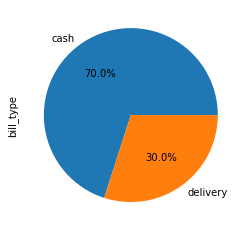

In [41]:
df_visualize['bill_type'].value_counts().plot(kind='pie', autopct='%1.1f%%');

    Comment:
       Seems like the 'cash' type overtakes the 'delivery' type by a ratio of 2:1

    2- Revenue based on the bill type (to figure out what makes the bussiness the
        most amount of money.

In [42]:
df_grouped_billtype = df_visualize.groupby('bill_type', axis=0).sum()

In [21]:
df_grouped_billtype

,bill_code,items_count,bill_val,val_aft_disc,net_worth,discount_%,discount_val
bill_type,,,,,,,
cash,6016863698,105687,1435769.32,1409012.16,1408426.82,11270.3,486.40
delivery,2663038371,73677,2201263.71,2115842.23,2111327.82,868.4,211.11


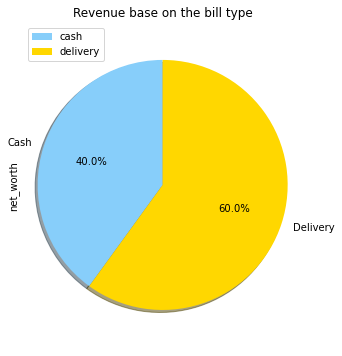

In [24]:
df_grouped_billtype['net_worth'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            labels= ['Cash', 'Delivery'],
                            colors = ['lightskyblue', 'gold'],
                            shadow=True)
plt.title('Revenue base on the bill type')
plt.axis('equal')
plt.legend(labels=df_grouped_billtype.index, loc='upper left') 
plt.show()

### Interesting finding
    Despite the fact that the cash bills are as twice as the delivery ones, the 
    revenue is only 41% of the total revenue.

    3- Who is the business's biggest client over the years?

In [43]:
df_grouped_clientcode = df_visualize.groupby('client_code', axis=0).sum()

In [26]:
df_grouped_clientcode = df_grouped_clientcode['net_worth']

In [27]:
df_grouped_clientcode = df_grouped_clientcode.sort_values(ascending=False)

In [28]:
df_grouped_clientcode.drop(['cash'], axis=0, inplace=True)

In [29]:
df_name_and_code = df_new.groupby('client_code', axis=0)

In [44]:
df_name_and_code = df_visualize[['client_code', 'client_name']]

In [31]:
df_name_and_code.set_index('client_code', inplace=True)

In [32]:
df_name_and_code.drop(labels='cash', axis=0, inplace=True)

/home/moaman/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


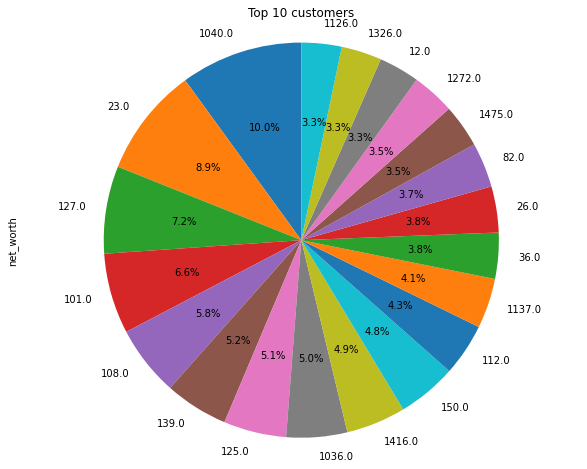

In [33]:
df_grouped_clientcode.head(20).plot(kind='pie',
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    figsize=(10,8))
plt.title('Top 10 customers')
plt.axis('equal')
plt.show()

In [24]:
code = str(input('Enter the client code: '))
name = df_name_and_code.loc[[code + '.0']]

print('The client name is:\n {}'.format(name['client_name'][0]))

Enter the client code: 108
The client name is:
 مصطفي حافظ


# Now for the "Loyalty program".
    In order to reward the clients who stayed with business the longest we
    create a loyalty program as a "In store credit" that they can use to buy
    anything inside the store with a max discount of 10% deducted from the points value.

### Tips on how to do it
    We can do this by grouping by client_code to a new dataframe and
    returning the sum of the values for the networth and discount value

In [137]:
df_loyalty_pro = df_visualize[['client_code', 'client_name', 'bill_val', 'val_aft_disc', 'discount_val']]

In [138]:
df_loyalty_pro.head()

,client_code,client_name,bill_val,val_aft_disc,discount_val
0,cash,cash,420.00,384.10,0.0
1,cash,cash,14.00,14.00,0.0
2,cash,cash,16.25,16.25,0.0
3,cash,cash,12.00,12.00,0.0
4,cash,cash,1.25,1.25,0.0


In [139]:
df_loyalty_pro['discount_val'] = df_loyalty_pro['bill_val'] - df_loyalty_pro['val_aft_disc']

/tmp/ipykernel_6144/67391346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loyalty_pro['discount_val'] = df_loyalty_pro['bill_val'] - df_loyalty_pro['val_aft_disc']


In [140]:
df_loyalty_pro.set_index('client_code', inplace=True)

In [141]:
df_loyal = df_loyalty_pro.groupby('client_code', axis=0).sum()

In [143]:
df_loyal.drop(labels='cash', axis=0, inplace=True)

In [144]:
df_loyal.sort_values(by='bill_val', axis=0, ascending=False, inplace=True)

In [176]:
df_loyal_least_discount = []
for a in df_loyal['discount_val'] and b in df_loyal['bill_val']:
    if a / b * 100 > 1:
        df_loyal_least_discount.append(a)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [160]:
df_loyal.loc['1272.0']

bill_val        37367.76
val_aft_disc    37360.35
discount_val        7.41
Name: 1272.0, dtype: float64

In [152]:
code = str(input('Enter the client code: '))
# str(input('Enter the client code: '))
name = df_loyalty_pro.loc[[code + '.0']]
print('The client name is:\n {}'.format(name['client_name'][0]))

Enter the client code: 1272
The client name is:
 د فاضل قهمى
